# <font color='green'>Tratando os dados do Spotify</font>

## <font color='green'>1. Instalando as bibliotecas:</font>

**Matplotlib, Numpy, Pandas, Seaborn e Wordcloud.
Serão utilizados também os módulos OS e json.**

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud -q

Note: you may need to restart the kernel to use updated packages.


In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import json
import os

sns.set_context("talk", font_scale=1)
sns.set_style("darkgrid")
sns.set_palette('tab10')
sns.set_color_codes()

In [7]:
# Lista de dados disponíveis 
os.listdir('./dados_tratados/spotify_completo/')

['.ipynb_checkpoints',
 'all_searchQueries.csv',
 'albums_completos',
 'all_streamingHistory.csv',
 'streaming_completo',
 'all_albums.csv',
 'search_completo']

## <font color='green'>2. Compreendendo os dados de cada arquivo da base</font>

<font color='green'>__Follow.json:__</font>
```
    Isso inclui (quando disponível) no momento da solicitação:    
    O número de seguidores que a conta possui.      
    O número de outras contas que esta conta segue.        
    O número de outras contas que esta conta está bloqueando.
```
               
<font color='green'>__Payments.json__</font>
```
    Isso inclui detalhes do método de pagamento (quando disponível):
    Tipo - O tipo de cartão, por exemplo, Mastercard, Visa, etc., ou outra forma de pagamento, como     
    Vale-presente, PayPal.
    Número do cartão - quando a forma de pagamento for cartão, são apenas os quatro últimos dígitos.
    Expiração do cartão - quando o método de pagamento é por cartão, esta é a data de validade de quatro    
    dígitos (por exemplo, 18/07).
    Data de criação - A data em que os detalhes do pagamento foram fornecidos ao Spotify.
    País de pagamento - o país onde o cartão foi emitido, por exemplo, Reino Unido, Suécia.
    Código postal - o código postal no qual o cartão está registrado.
```
    
<font color='green'>__SearchQueries.json__</font>
```
    Uma lista de pesquisas feitas, incluindo:
    A data e a hora em que a pesquisa foi feita.
    Tipo de dispositivo / plataforma usado (como iOS, desktop).
    A consulta de pesquisa mostra o que o usuário digitou no campo de pesquisa.
    Os URIs de interação da pesquisa mostram a lista de Uniform Resource Identifiers (URI) dos resultados     
    da pesquisa com os quais o usuário interagiu.   
    Para comandos feitos por voz, consulte Entrada de voz abaixo.
```

<font color='green'>__Userdata.json__</font>
```
    Isso inclui (quando disponível):
    Nome de usuário do Spotify.
    Endereço de e-mail.
    País.
    Criado a partir do Facebook - Isso é verdadeiro se a conta foi criada através do Facebook.
    ID de usuário do Facebook - Isso é incluído se o usuário ativou o processamento de dados do Facebook e     
    vinculou sua conta do Spotify ao entrar usando o login do Facebook ou criou sua conta do Spotify     
    através do Facebook.
    Local preferido.
    Data de nascimento.
    Gênero.
    Código postal.
    Endereço postal.
    Número de celular.
    Operador móvel.
    Marca móvel.
    Criação da conta - Esta é a data de registro do usuário. 
```    
    
<font color='green'>__YourLibrary.json__</font>
```
    Um resumo (no ponto da data da solicitação) do conteúdo salvo em sua biblioteca (músicas, episódios,    
    programas, artistas e álbuns), incluindo:
    Nomes de entidades.
    Nomes de álbuns e shows.
    Criadores.
    Identificadores Uniformes de Recursos do Item (URIs). 
```

<font color='green'>__Identity.json__</font>
```
    Dados do usuário como nome da conta, primeiro e segundo nome, imagem do perfil e se o perfil é    
    verificado.
```

<font color='green'>__Inferences.json__</font>
```
    Tiramos certas inferências sobre seus interesses e preferências com base em seu uso do serviço Spotify    
    e usando dados obtidos de nossos anunciantes e outros parceiros de publicidade.    
    Isso inclui uma lista de segmentos de mercado aos quais você está atualmente associado.    
    Dependendo de suas configurações, esses dados podem ser usados para veicular publicidade com base em     
    interesses para você dentro do serviço Spotify.    
```

<font color='green'>__Playlist1.json__</font>
```
    Um resumo das listas de reprodução criadas ou salvas e todas as músicas salvas, incluindo:
    Nome da lista de reprodução.
    Data em que a lista de reprodução foi modificada pela última vez.
    Nomes das músicas contidas na lista de reprodução.
    Nomes de artistas para cada música.
    Nomes de álbuns ou episódios (se podcasts).
    Nome da faixa local, se o usuário carregou áudio salvo localmente para ser reproduzido no serviço     
    Spotify.
    Quaisquer descrições adicionadas pelo usuário à lista de reprodução.
    O número de seguidores da lista de reprodução. 
```

<font color='green'>__StreamingHistory0.json__</font>
```
    Uma lista de itens (por exemplo, músicas, vídeos e podcasts) ouvidos ou assistidos no ano anterior,     
    incluindo:
    Data e hora de quando o stream terminou no formato UTC (fuso horário universal coordenado).
    Nome do "criador" de cada fluxo (por exemplo, o nome do artista, se for uma faixa de música).
    Nome dos itens ouvidos ou assistidos (por exemplo, título da faixa musical ou nome do vídeo).
    “MsPlayed” - Significa quantos milissegundos a faixa foi ouvida. 
```

## <font color='green'>3. Importando as bases de dados</font>

In [8]:
# 01 - Histórico das músicas ouvidas
df_history = pd.read_csv('dados_tratados/spotify_completo/all_streamingHistory.csv')

In [9]:
df_history.head(5)

,endTime,artistName,trackName,minPlayed,month,dayOfMonth,dayOfWeek,timeOfDay,date
0,2021-03-29 01:14:00,Birdtalker,Ankle Bone,0.840050,March,29,Monday,1,2021-03-29 00:00:00
1,2021-03-29 01:20:00,Low Roar,Easy Way Out,0.730833,March,29,Monday,1,2021-03-29 00:00:00
2,2021-03-29 01:20:00,Low Roar,I'll Keep Coming,5.872433,March,29,Monday,1,2021-03-29 00:00:00
3,2021-04-05 20:43:00,Ana Santos,Pintinho amarelinho,0.124433,April,5,Monday,20,2021-04-05 00:00:00
4,2021-04-05 20:45:00,Virtual Orchestra,"Bobeou, Dançou",0.384500,April,5,Monday,20,2021-04-05 00:00:00


In [10]:
# Verificando o tamanho do dataset
df_history.shape[0]

1165

In [11]:
# 02 - Albuns curtidos
df_albums = pd.read_csv('dados_tratados/spotify_completo/all_albums.csv')

In [12]:
# Verificando o tamanho do dataset
df_albums.shape[0]

199

In [13]:
# 03 - Pesquisas realizadas
df_search = pd.read_csv('dados_tratados/spotify_completo/all_searchQueries.csv')
df_search.head(5)

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2021-05-01 17:41:04,ac/dc,"['spotify:playlist:0DmSdNrUjJWqXD7UnUGVn8', 's..."
1,ANDROID,2021-05-01 17:42:15,low roar,['spotify:playlist:3NHJr2O6HVU1Dnywxogcyo']
2,ANDROID,2021-05-01 17:42:57,rap nacional,['spotify:playlist:07DFhdfMTy8VhvstdHqGEd']
3,ANDROID,2021-05-01 17:50:07,resistance,['spotify:playlist:27yXXsKK8JBZiymoNnXHde']
4,ANDROID,2021-05-02 14:19:27,london grammar,['spotify:playlist:37i9dQZF1DZ06evO0a532y']


In [14]:
# Verificando o tamanho do dataset
df_search.shape[0]

94

## <font color='green'>4. Limpando os dados</font>

## <font color='green'>4.1. Relembrando os detalhes do arquivo Streaming History:</font>

Variáveis:

__endTime:__ Data e hora de quando o stream terminou no formato UTC (fuso horário universal coordenado).    
__artistName:__ Nome do "criador" de cada fluxo (por exemplo, o nome do artista, se for uma faixa de música).   
__trackName:__ Nome dos itens ouvidos ou assistidos (por exemplo, título da faixa musical ou nome do vídeo).   
__msPlayed:__ Significa quantos milissegundos a faixa foi ouvida. 

In [15]:
# Checando quantos dados temos em cada variável
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   endTime     1165 non-null   object 
 1   artistName  1165 non-null   object 
 2   trackName   1165 non-null   object 
 3   minPlayed   1165 non-null   float64
 4   month       1165 non-null   object 
 5   dayOfMonth  1165 non-null   int64  
 6   dayOfWeek   1165 non-null   object 
 7   timeOfDay   1165 non-null   int64  
 8   date        1165 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 82.0+ KB


In [16]:
df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   platform               94 non-null     object
 1   searchTime             94 non-null     object
 2   searchQuery            94 non-null     object
 3   searchInteractionURIs  94 non-null     object
dtypes: object(4)
memory usage: 3.1+ KB


## <font color='green'>4.2. Verificando se há dados nulos</font>

In [17]:
# 01 - Histórico de músicas ouvidas
df_history.isnull().sum()

endTime       0
artistName    0
trackName     0
minPlayed     0
month         0
dayOfMonth    0
dayOfWeek     0
timeOfDay     0
date          0
dtype: int64

In [18]:
# Estatísticas básicas das variáveis numéricas, no caso, da msPlayed
df_history.describe().round(2)

,minPlayed,dayOfMonth,timeOfDay
count,1165.00,1165.00,1165.00
mean,3.16,17.59,13.73
std,3.17,7.13,6.24
min,0.00,1.00,0.00
25%,2.22,14.00,10.00
50%,3.25,20.00,15.00
75%,3.97,23.00,18.00
max,90.37,31.00,23.00


In [19]:
# 02- Albuns curtidos
df_albums.isnull().sum()

artist    0
album     0
dtype: int64

In [20]:
# 03 - Histórico de pesquisa
df_search.isnull().sum()

platform                 0
searchTime               0
searchQuery              0
searchInteractionURIs    0
dtype: int64

## <font color='green'>4.3. Verificando os tipos de dados em cada DataFrame</font>

In [21]:
# 01 - Histórico de músicas ouvidas
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   endTime     1165 non-null   object 
 1   artistName  1165 non-null   object 
 2   trackName   1165 non-null   object 
 3   minPlayed   1165 non-null   float64
 4   month       1165 non-null   object 
 5   dayOfMonth  1165 non-null   int64  
 6   dayOfWeek   1165 non-null   object 
 7   timeOfDay   1165 non-null   int64  
 8   date        1165 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 82.0+ KB


In [22]:
# 02 - Albuns curtidos
df_albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  199 non-null    object
 1   album   199 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [23]:
# 03 - Histórico de pesquisa
df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   platform               94 non-null     object
 1   searchTime             94 non-null     object
 2   searchQuery            94 non-null     object
 3   searchInteractionURIs  94 non-null     object
dtypes: object(4)
memory usage: 3.1+ KB


In [24]:
# Exibindo o dtypes com uma melhor formatação, como um DataFrame
pd.DataFrame(df_history.dtypes, columns=['Tipos de dados'])

,Tipos de dados
endTime,object
artistName,object
trackName,object
minPlayed,float64
month,object
dayOfMonth,int64
dayOfWeek,object
timeOfDay,int64
date,object


In [25]:
df_history.head(5)

,endTime,artistName,trackName,minPlayed,month,dayOfMonth,dayOfWeek,timeOfDay,date
0,2021-03-29 01:14:00,Birdtalker,Ankle Bone,0.840050,March,29,Monday,1,2021-03-29 00:00:00
1,2021-03-29 01:20:00,Low Roar,Easy Way Out,0.730833,March,29,Monday,1,2021-03-29 00:00:00
2,2021-03-29 01:20:00,Low Roar,I'll Keep Coming,5.872433,March,29,Monday,1,2021-03-29 00:00:00
3,2021-04-05 20:43:00,Ana Santos,Pintinho amarelinho,0.124433,April,5,Monday,20,2021-04-05 00:00:00
4,2021-04-05 20:45:00,Virtual Orchestra,"Bobeou, Dançou",0.384500,April,5,Monday,20,2021-04-05 00:00:00


## <font color='green'>4.4. Convertendo a coluna searchTime (Search Queries)</font>

>A coluna searchTime está com o tipo object, ou seja, string -> Quero o formato datetime     

In [26]:
df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   platform               94 non-null     object
 1   searchTime             94 non-null     object
 2   searchQuery            94 non-null     object
 3   searchInteractionURIs  94 non-null     object
dtypes: object(4)
memory usage: 3.1+ KB


In [27]:
# Convertendo searchTime de strings para datetime
df_search['searchTime'] = pd.to_datetime(df_search['searchTime'])

df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   platform               94 non-null     object        
 1   searchTime             94 non-null     datetime64[ns]
 2   searchQuery            94 non-null     object        
 3   searchInteractionURIs  94 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.1+ KB


In [28]:
df_search.head()

,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID,2021-05-01 17:41:04,ac/dc,"['spotify:playlist:0DmSdNrUjJWqXD7UnUGVn8', 's..."
1,ANDROID,2021-05-01 17:42:15,low roar,['spotify:playlist:3NHJr2O6HVU1Dnywxogcyo']
2,ANDROID,2021-05-01 17:42:57,rap nacional,['spotify:playlist:07DFhdfMTy8VhvstdHqGEd']
3,ANDROID,2021-05-01 17:50:07,resistance,['spotify:playlist:27yXXsKK8JBZiymoNnXHde']
4,ANDROID,2021-05-02 14:19:27,london grammar,['spotify:playlist:37i9dQZF1DZ06evO0a532y']


In [29]:
df_history['endTime'] = pd.to_datetime(df_history['endTime'])

df_history['date'] = pd.to_datetime(df_history['date'])

df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     1165 non-null   datetime64[ns]
 1   artistName  1165 non-null   object        
 2   trackName   1165 non-null   object        
 3   minPlayed   1165 non-null   float64       
 4   month       1165 non-null   object        
 5   dayOfMonth  1165 non-null   int64         
 6   dayOfWeek   1165 non-null   object        
 7   timeOfDay   1165 non-null   int64         
 8   date        1165 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 82.0+ KB


## <font color='green'>5. Análise Exploratória</font>

In [30]:
pd.DataFrame(df_history['artistName'].unique(), columns = ['Artistas'])

,Artistas
0,Birdtalker
1,Low Roar
2,Ana Santos
3,Virtual Orchestra
4,Aline Romeiro
...,...
257,Melvin Taylor
258,Natalia M. King
259,Big Daddy Wilson
260,Tape Five


In [31]:
df_history['artistName'].value_counts().head(20)

Djonga                                209
Arctic Monkeys                        102
Pineapple StormTv                      75
Vitão                                  62
Passenger                              45
Filipe Ret                             31
Scott Bradlee's Postmodern Jukebox     31
L7NNON                                 25
Fleet Foxes                            20
Criolo                                 19
Jorge Ben Jor                          18
Emicida                                16
Max Frost                              15
Céu                                    14
3030                                   14
Xamã                                   11
Papatinho                              10
Oriente                                10
Norah Jones                            10
Matuê                                  10
Name: artistName, dtype: int64

In [32]:
(df_history['artistName'] == 'Djonga').value_counts()

False    956
True     209
Name: artistName, dtype: int64

In [33]:
df_history['trackName'].value_counts().head(20)

Procuro Alguém (prod. Coyote Beatz)      23
Eu Não Sou Tão Bom Assim                 18
Mania (prod. Coyote Beatz)               16
Hoje Não (prod. Coyote Beatz)            15
Easy Money                               15
Todo Errado (prod. Coyote Beatz)         14
Esquimó                                  12
Te Liguei                                11
Gelo (prod. Coyote Beatz)                10
Poesia Acústica #6: Era uma Vez           9
O Cara de Óculos (prod. Coyote Beatz)     9
Embrasa                                   9
Redbone                                   8
LEAL                                      8
Ó Quem Chega                              8
Oto Patamá (prod. Coyote Beatz)           8
Deus Dará (prod. Coyote Beatz)            8
No. 1 Party Anthem                        8
Você Tem                                  7
Caderninho                                7
Name: trackName, dtype: int64

In [34]:
df_history['minPlayed'].max()

90.36846666666666

In [35]:
df_history.describe()

,minPlayed,dayOfMonth,timeOfDay
count,1165.000000,1165.000000,1165.00000
mean,3.155256,17.586266,13.72618
std,3.168029,7.125325,6.24236
min,0.000000,1.000000,0.00000
25%,2.217450,14.000000,10.00000
50%,3.245317,20.000000,15.00000
75%,3.967100,23.000000,18.00000
max,90.368467,31.000000,23.00000


## <font color='green'>5.1. Músicas ouvidas por dia</font>

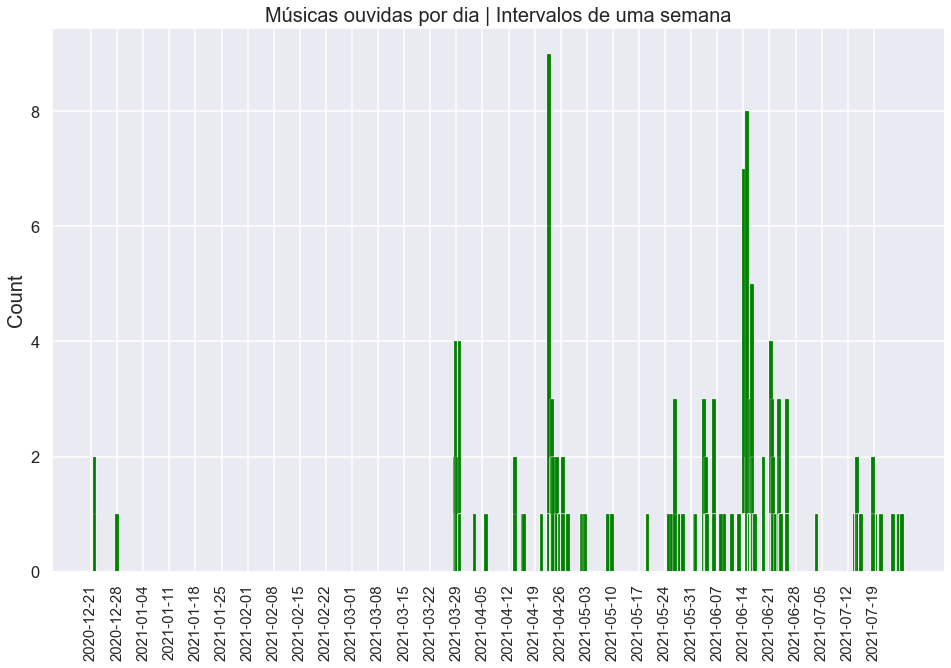

In [36]:
fig = plt.figure(figsize=(16,10))

# Músicas ouvidas por dia
x = df_history.groupby('endTime').size().index
y = df_history.groupby('endTime').size().values
xticks = pd.date_range(x[0],x[-1]).date[::7]
plt.bar(x,y, width=1, linewidth=0.2, color='green')
ax = plt.gca()

# Durante intervalos de uma semana
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize = 15)
ax.tick_params('x', rotation= 90)
ax.set_ylabel('Count', fontsize= 20)
ax.set_title('Músicas ouvidas por dia | Intervalos de uma semana', fontsize= 20)

plt.show()

## <font color='green'>5.2. Os 20 artistas mais ouvidos</font>

Text(0.5, 1.0, 'Minutos ouvidos por artista')

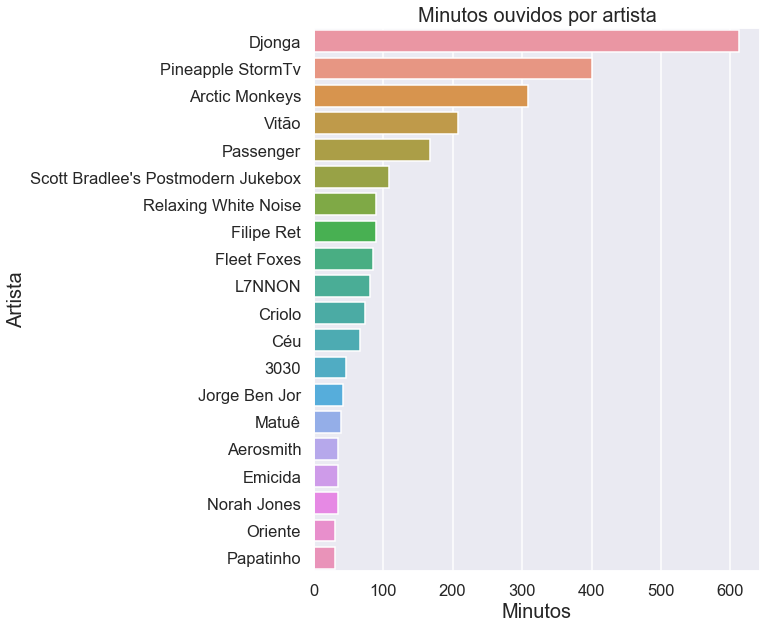

In [37]:
# Ignorando alertas de erros futuros
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

fig = plt.figure(figsize=(8,10))
ax = plt.subplot(111)
data = df_history.groupby('artistName')['minPlayed'].sum().sort_values(ascending=False)[:20]
x = data.index
y = data.values

sns.barplot(y, x, orient= "h", ax= ax)
ax.set_xlabel('Minutos', fontsize=20)
ax.set_ylabel('Artista', fontsize=20)
ax.set_title('Minutos ouvidos por artista', fontsize=20)

## <font color='green'>5.3. As 20 faixas mais ouvidas</font>

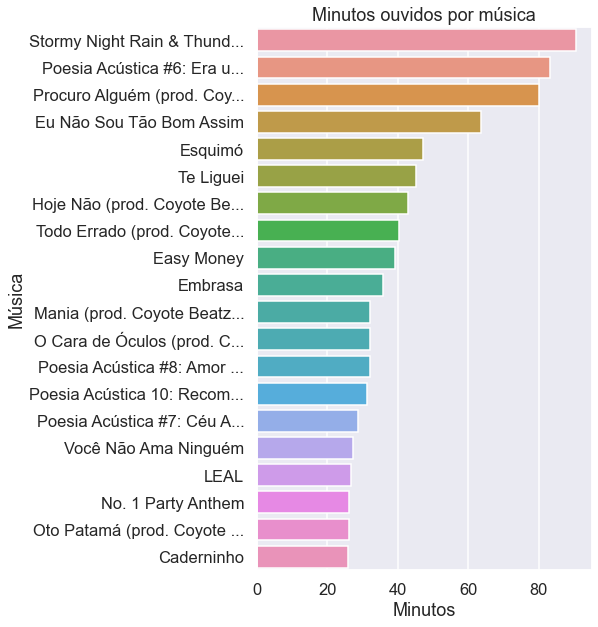

In [38]:
fig = plt.figure(figsize=(6,10))
ax = plt.subplot(111)
data = df_history.groupby('trackName')['minPlayed'].sum().sort_values(ascending=False)[:20]
x = data.index
y = data.values
sns.barplot(y,x, orient="h", ax = ax)
ax.set_xlabel('Minutos')
ax.set_ylabel('Música')

# Diminuindo o rótulo do nome da música (para o caso de músicas com nome muito longo)
yticklabels = []
for label in ax.get_yticklabels():
    text = label.get_text()
    if len(text) > 25:
        yticklabels.append(text[:25] + '...')
    else:
        yticklabels.append(text)
ax.set_yticklabels(yticklabels)

plt.title('Minutos ouvidos por música')
plt.show()

## <font color='green'>5.4 Frequência de escuta por hora do dia</font>

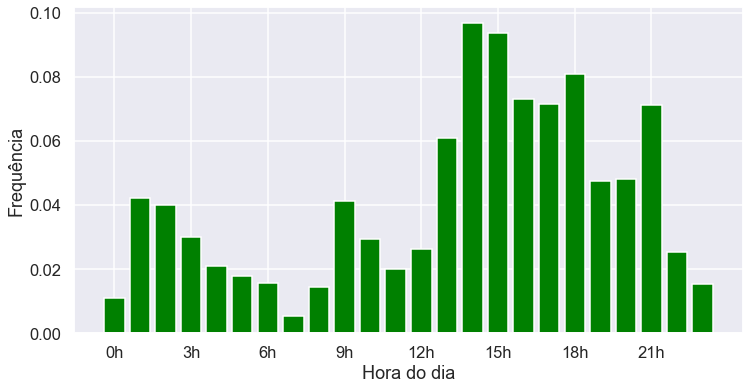

In [39]:
fig = plt.figure(figsize=(12,6))
data = df_history.groupby('timeOfDay')['minPlayed'].sum()
x, y = data.index, data.values
plt.bar(x,y/y.sum(), color='green')

xticks = np.arange(24)
xticklabels = [str(i) + 'h' for i in xticks]
plt.xticks(xticks[::3], xticklabels[::3])

plt.ylabel('Frequência')
plt.xlabel('Hora do dia')

plt.show()

## <font color='green'>5.5. Frequência de escuta por dia da semana</font>

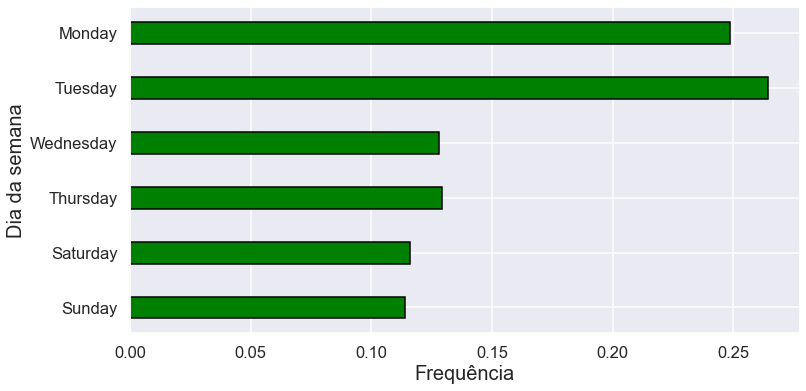

In [40]:
fig = plt.figure(figsize=(12,6))
data = df_history.groupby('dayOfWeek')['minPlayed'].sum()
data = data[[1,5,6,4,2,3]][::-1]
x, y = data.index, data.values

plt.barh(x,y/y.sum(), height=0.4, color='green', edgecolor='black')
plt.xlabel('Frequência', fontsize= 20)
plt.ylabel('Dia da semana', fontsize= 20)

plt.show()

## <font color='green'>5.6. Mapa de calor</font>

Text(58.421875, 0.5, 'Dia da semana')

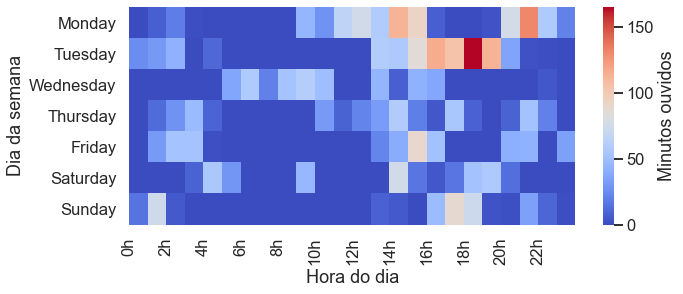

In [41]:
time_per_week = df_history.pivot_table(columns='timeOfDay', index='dayOfWeek', 
                                    values='minPlayed', aggfunc=np.sum).fillna(0)

# Os dias da semana foram embaralhados
time_per_week = time_per_week.iloc[[1,5,6,4,0,2,3],:]
fig = plt.figure(figsize=(10,4))
ax = sns.heatmap(time_per_week, cmap='coolwarm',
                 cbar_kws=dict(label='Minutos ouvidos'))

# Definindo detalhes como rótulos e orientação da imagem
xticks = np.arange(24)
xticklabels = [str(i) + 'h' for i in xticks]
ax.set_xticks(xticks[::2])
ax.set_xticklabels(xticklabels[::2])
ax.tick_params('x',rotation=90)

ax.set_xlabel('Hora do dia')
ax.set_ylabel('Dia da semana')

## <font color='green'>5.7. Nuvem de palavras</font>

Criei duas wordclouds, uma com os nomes dos artistas e outra com os nomes das músicas.    
Os artistas com mais músicas tem mais visibilidade.     
Seguindo a mesma lógica, as músicas tocadas mais vezes aparecem em maior destaque.


In [42]:
# Percorrendo a variável artistName para armazenar na variável músicas
artistas = " ".join(s for s in df_history['artistName'])

# Imprimindo a quantidade de palavras
print(f"Quantidade de Palavras: {len(artistas)}")

Quantidade de Palavras: 12829


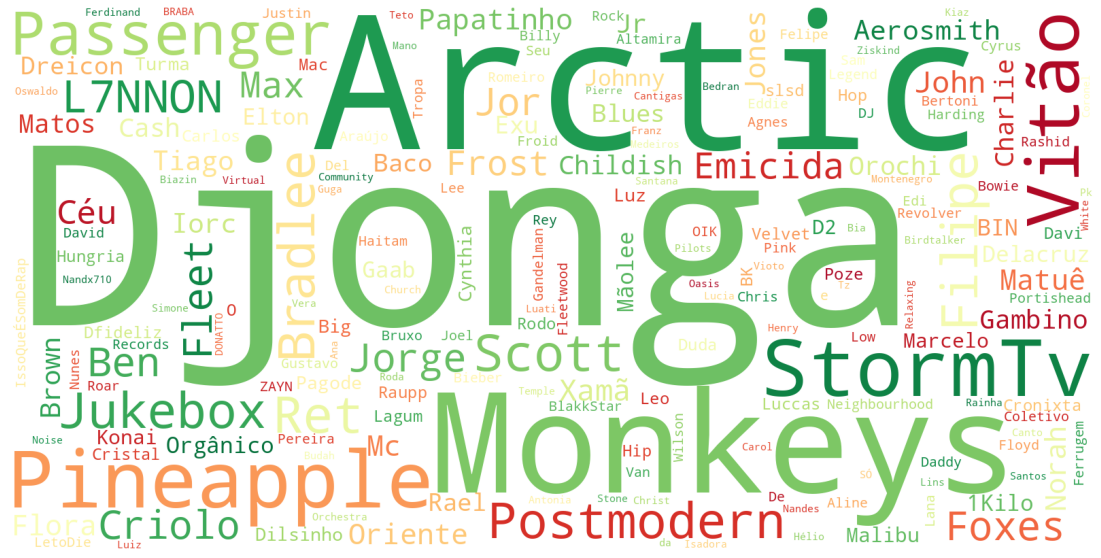

In [43]:
# Gerando uma nuvem de palavras
wordcloud = WordCloud(background_color="white",
                      width=1600, height=800, random_state=1, colormap="RdYlGn", collocations=False).generate(artistas)

# Definindo detalhes da imagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
#wordcloud.to_file("artistas_spotify2_michelle.png");

In [44]:
# Percorrendo a variável trackName para armazenar na variável músicas
musicas = " ".join(s for s in df_history['trackName'])

# Imprimindo a quantidade de palavras
print(f"Quantidade de Palavras: {len(musicas)}")

Quantidade de Palavras: 23060


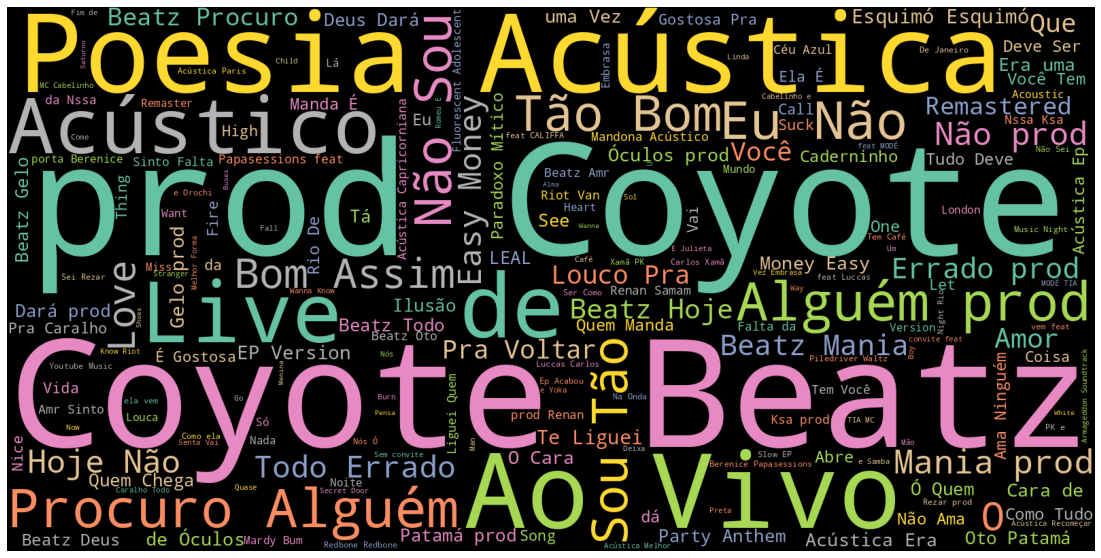

In [45]:
# Gerando uma nuvem de palavras
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800, random_state=1, colormap="Set2").generate(musicas)

# Definindo detalhes da imagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
#wordcloud.to_file("musicas_spotify_michelle.png");

## <font color='green'>6. Salvando os DataFrames com dados tratados</font>

In [46]:
# 01 - Salvando o histórico das músicas ouvidas
#all_streamingHistory.to_csv("./dados_tratados/spotify_completo/all_streamingHistory.csv", index = None)

In [47]:
# 02 - Salvando os álbuns curtidos
#all_albums.to_csv("./dados_tratados/spotify_completo/all_albums.csv", index = None)

In [48]:
# 03 - Salvando os dados de busca 
#all_searchQueries.to_csv("./dados_tratados/spotify_completo/all_searchQueries.csv", index = None)

## <font color='green'>Fim</font>